In [1]:
from chromo.models import (
    Pythia8,
    DpmjetIII191,
    DpmjetIII306,
    DpmjetIII193,
    Phojet191,
    Phojet193,
    Phojet112,
    Sibyll21,
    Sibyll23d,
    UrQMD34,
)
from chromo.kinematics import CenterOfMass, GeV
import boost_histogram as bh


In [2]:
m = DpmjetIII306(CenterOfMass(1000 * GeV, "p", "p"), seed=1)

 +-----------------------------------------------------------------------+
 |                                                                       |
 |                          DPMJET version 3.0-6                         |
 |                                                                       |
 |                      (Last change:  5 May 2012)                       |
 |                                                                       |
 |            Authors: Stefan Roesler   (CERN)                           |
 |                     Ralph Engel      (FZ Karlsruhe)                   |
 |                     Johannes Ranft   (Siegen Univ.)                   |
 |                                                                       |
 +-----------------------------------------------------------------------+
 | Please send suggestions, bug reports, etc. to: Stefan.Roesler@cern.ch |
 +-----------------------------------------------------------------------+


Warning!  No evaporatio

In [3]:
# m._lib.pomdls.iswmdl[6 - 1] = 4

In [4]:
# kc = m._lib.pycomp(3122)
# print(m._lib.pydat3.mdcy[kc - 1, 0])
# m._lib.pydat1.mstj[22-1] = 1
# # m._lib.pydat3.mdcy[kc - 1, 0] = 1


In [ ]:
m.set_stable(211, True)
for event in m(1000):
        fs = event.final_state()
        if 211 in fs.pid:
            print(fs.pid)
            break

1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                                          **
 **                                                                          **
 **              *......*                  Welcome to the Lund Monte Carlo!  **
 **         *:::!!:::::::::::*                                               **
 **      *::::::!!::::::::::::::*          PPP  Y   Y TTTTT H   H III   A    **
 **    *::::::::!!::::::::::::::::*        P  P  Y Y    T   H   H  I   A A   **
 **   *:::::::::!!:::::::::::::::::*       PPP    Y     T   HHHHH  I  AAAAA  **
 **   *:::::::::!!:::::::::::::::::*       P      Y     T   H   H  I  A   A  **
 **    *::::::::!!::::::::::::::::*!       P      Y     T   H   H III A   A  **
 **      *::::::!!::::::::::::::* !!    

In [5]:
m._lib.pho_prevnt(2)



 PHO_PREVNT: c.m. energy 1.000E+03
 PHO_SETPAR: side 1 IDPDG,IDcpc,PMASS,PVIRT   2212   1  9.383E-01 0.000E+00
 PHO_SETPAR: side 2 IDPDG,IDcpc,PMASS,PVIRT   2212   1  9.383E-01 0.000E+00
      EV-CALL,ISPOM,IHPOM,ISREG,IHDIR,KSTRG,KHTRG,KSLOO,KHLOO,KSDPO,KHDPO
          0     0     0     0     0     0     0     0     0     0     0
      PROCESS-ID,IDNODF,IDIFF1,IDIFF2,IDDPOM   0  0  0  0  0

 PHO_PRSTRG: number of strings soft+hard:    0

 COMMON /POSTRG/:
  NOBAM  ID1  ID2  ID3  ID4     NPO1/2/3/4        MASS

 COMMON /POEVT1/:

    NO  IST    NAME         MO-1 MO-2 DA-1 DA-2  CHA  BAR  IH1  IH2  CO1  CO2
     1    1 d                  0    0    0    0 -0.3  0.3    0    0   -1    1
     2    1 d                  0    0    0    0 -0.3  0.3    0    0   -1    1
    sum charge:  0   baryon:  0       chr.mult:    2     tot.mult:    2

   NR STAT NAME        X-MOMENTA Y-MOMENTA Z-MOMENTA  ENERGY    MASS     PT
  ---------------------------------------------------------------------------
 

In [2]:

kin = CenterOfMass(1000 * GeV, "p", "p")

nevents = 10000

# models = [Phojet191, Phojet193]#, DpmjetIII191, DpmjetIII193]
# models = [DpmjetIII191, DpmjetIII193]
models = [Sibyll23d, Phojet112, Phojet193]
h = bh.Histogram(
    bh.axis.Regular(20, -10, 10),
    bh.axis.IntCategory([], growth=True),
    bh.axis.Integer(0, len(models)),
)
mnames = []
for iModel, Model in enumerate(models):
    m = Model(kin, seed=1)
    m.set_stable(3122, False)
    mnames.append(m.name + " " + m.version)
    for event in m(nevents):
        fs = event.final_state()
        h.fill(fs.eta, fs.pid, iModel)

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
1

                                                     
       ----      PHOJET ver

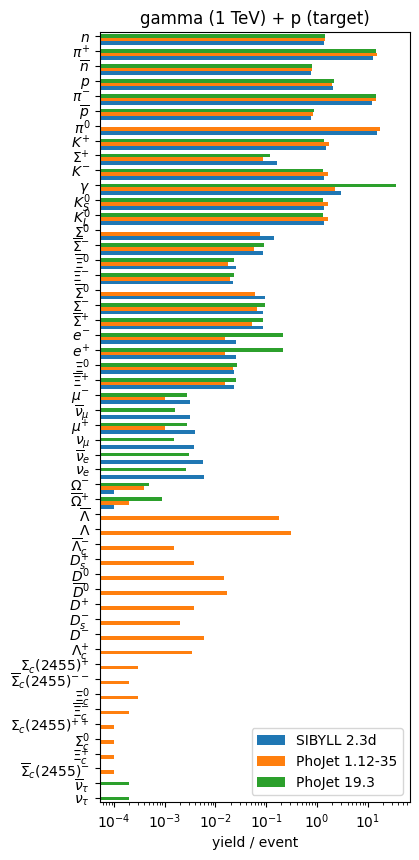

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from particle import Particle

y = -np.arange(len(h.axes[1]))
plt.figure(figsize=(4, 10))
for im, mn in enumerate(mnames):
    plt.barh(-0.5 + y + im*0.25, h[sum, :, im].values() / nevents, label=mn, height=0.25)
plt.yticks(y, (f"${Particle.from_pdgid(x).latex_name}$" for x in h.axes[1]))
plt.semilogx()
plt.legend()
plt.xlabel("yield / event")
plt.ylim(y[-1] - 0.25, y[0] + 0.25)
plt.title("gamma (1 TeV) + p (target)");